# Lead poisoning in Illinois (2000-2006) by Thierry Guigma

For this project, I decided to investigate the data from the lead poisoning surveillance conducted in Illinois from 2000 to 2006. To this end, I have downloaded the seven corresponding datasets from the state dataset repository (data.illinois.gov) and available at https://data.illinois.gov/dataset.

Each dataset explores lead concentrations among children in Illinois per county for a given year between 2000-2006, and contains 8 variables and 104 rows (each representing a county/location).

VARIABLES: lead concentration variables (5 levels of concentration), population variables (total under 6 years old, total tested), and the location variable (county).

Since the datasets are publicly available on a government website, they can be used for research.

I have combined the datasets into a unique one to have the full range of the surveillance for that period (2000-2006) for my analysis, and created new variables that I will explained in detail below.


In [23]:
# Let us import the required libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bqplot
import ipywidgets

# And import the data:
data = pd.read_csv('https://raw.githubusercontent.com/tguigma/DataViz_Final-Project/master/LeadF.csv')

# And finally visualize it:
data

,_10_14_mcg_dl,_15_19_mcg_dl,_2000_population_of_children_6_and_under,_20_24_mcg_dl,_25_44_mcg_dl,_45_mcg_dl,county,total_tested,lrate1,lrate2,lrate3,lrate4,lrate5,lscore,Year
0,22,9,5652,2,1,0,Adams,959,22.940563,9.384776,2.085506,1.042753,0.000000,44.316997,2006
1,4,0,889,0,1,0,Alexander,190,21.052632,0.000000,0.000000,5.263158,0.000000,36.842105,2006
2,4,0,1425,1,1,0,Bond,292,13.698630,0.000000,3.424658,3.424658,0.000000,30.821918,2006
3,17,3,4735,0,4,0,Boone,735,23.129252,4.081633,0.000000,5.442177,0.000000,45.578231,2006
4,1,0,410,0,0,0,Brown,75,13.333333,0.000000,0.000000,0.000000,0.000000,13.333333,2006
5,8,1,3015,0,1,0,Bureau,352,22.727273,2.840909,0.000000,2.840909,0.000000,35.511364,2006
6,0,0,373,0,0,0,Calhoun,80,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2006
7,6,5,1159,1,0,0,Carroll,306,19.607843,16.339869,3.267974,0.000000,0.000000,50.653595,2006
8,10,7,1376,2,1,0,Cass,346,28.901734,20.231214,5.780347,2.890173,0.000000,79.479769,2006
9,35,4,15229,0,2,1,Champaign,1880,18.617021,2.127660,0.000000,1.063830,0.531915,27.659574,2006


The new variables I have created are: 
    
    lrate1: rate (thousands) for lead concentration 10-14mg/dL
    
    lrate2: rate (thousands) for lead concentration 15-19mg/dL
    
    lrate3: rate (thousands) for lead concentration 20-24mg/dL
    
    lrate4: rate (thousands) for lead concentration 25-44mg/dL
    
    lrate5: rate (thousands) for lead concentration 45mg/dL and more
    
   And 

lscore: a score of lead concentration calculated based on the sum of the corresponding weighted lrates per county:
   
    lscore = lrate1 + (lrate2 × 1.5) + (lrate3 × 2) + (lrate4 × 3) + (lrate5 × 5)
    
The weights I have applied are proportional to the range of the classes of concentration and increase with their values.  For the highest class  (45mg/dL) I have used an arbitrary value of 5 for the weight. 

Obviously, the lscore will vary depending of  the value of the weights, but should help to assess the overall burden of the lead poisoning in these counties. 

In [24]:
# To explore the burden of lead poisoning in each of the counties in Illinois, I will create a dashboard composed by
# an heatmap describing per county and per year the value of the lscore. The value is automatically printed when selecting
# a case on the heatmap:

x=data['county']
y=data['Year']
z=data['lscore']

# We will consider their unique names:
xnames = x.unique()
ynames = y.unique()
znames = np.zeros([len(xnames),len(ynames)])

# We fill the data
for i,xn in enumerate(xnames):
    for j, yn in enumerate(ynames):
        mask = (x == xn) & (y == yn)
        znames[i,j] = z[mask]

col_sc = bqplot.ColorScale(scheme='RdPu')
x_sc = bqplot.OrdinalScale()
y_sc = bqplot.OrdinalScale()


c_ax = bqplot.ColorAxis(scale = col_sc, 
                        orientation = 'vertical', 
                        side = 'right')

x_ax = bqplot.Axis(scale = x_sc, 
                   tick_style={'font-size':'15px'})
y_ax = bqplot.Axis(scale = y_sc, 
                   orientation = 'vertical', tick_rotate=30,  tick_style={'font-size':'10px'})

    
HM = bqplot.GridHeatMap(color = znames,
                              row = xnames, 
                              column = ynames,
                              scales = {'color': col_sc,
                                        'row': y_sc,
                                        'column': x_sc},
                              interactions = {'click': 'select'},
                              anchor_style = {'fill':'blue'}, 
                              selected_style = {'opacity': 1.0},
                              unselected_style = {'opacity': 1.0})

fig = bqplot.Figure(marks = [HM], axes = [c_ax, y_ax, x_ax])


mySelectedLabel = ipywidgets.Label()

def get_data_value(change):
    i,j = change['owner'].selected[0]
    v = znames[i,j] 
    mySelectedLabel.value = 'Lead concentration score : ' + str(v)

###
HM.observe(get_data_value, 'selected')

fig.layout.min_width = '900px'
fig.layout.min_height= '1250px'

ipywidgets.VBox([mySelectedLabel, fig])

      We get a sense that the burden of lead poisoning has generally decreased from 2000 to 2006 in Illinois, which suggests           that the  efforts conducted by the Illinois Department of Public Health to mitigate the phenomenon were effective. 

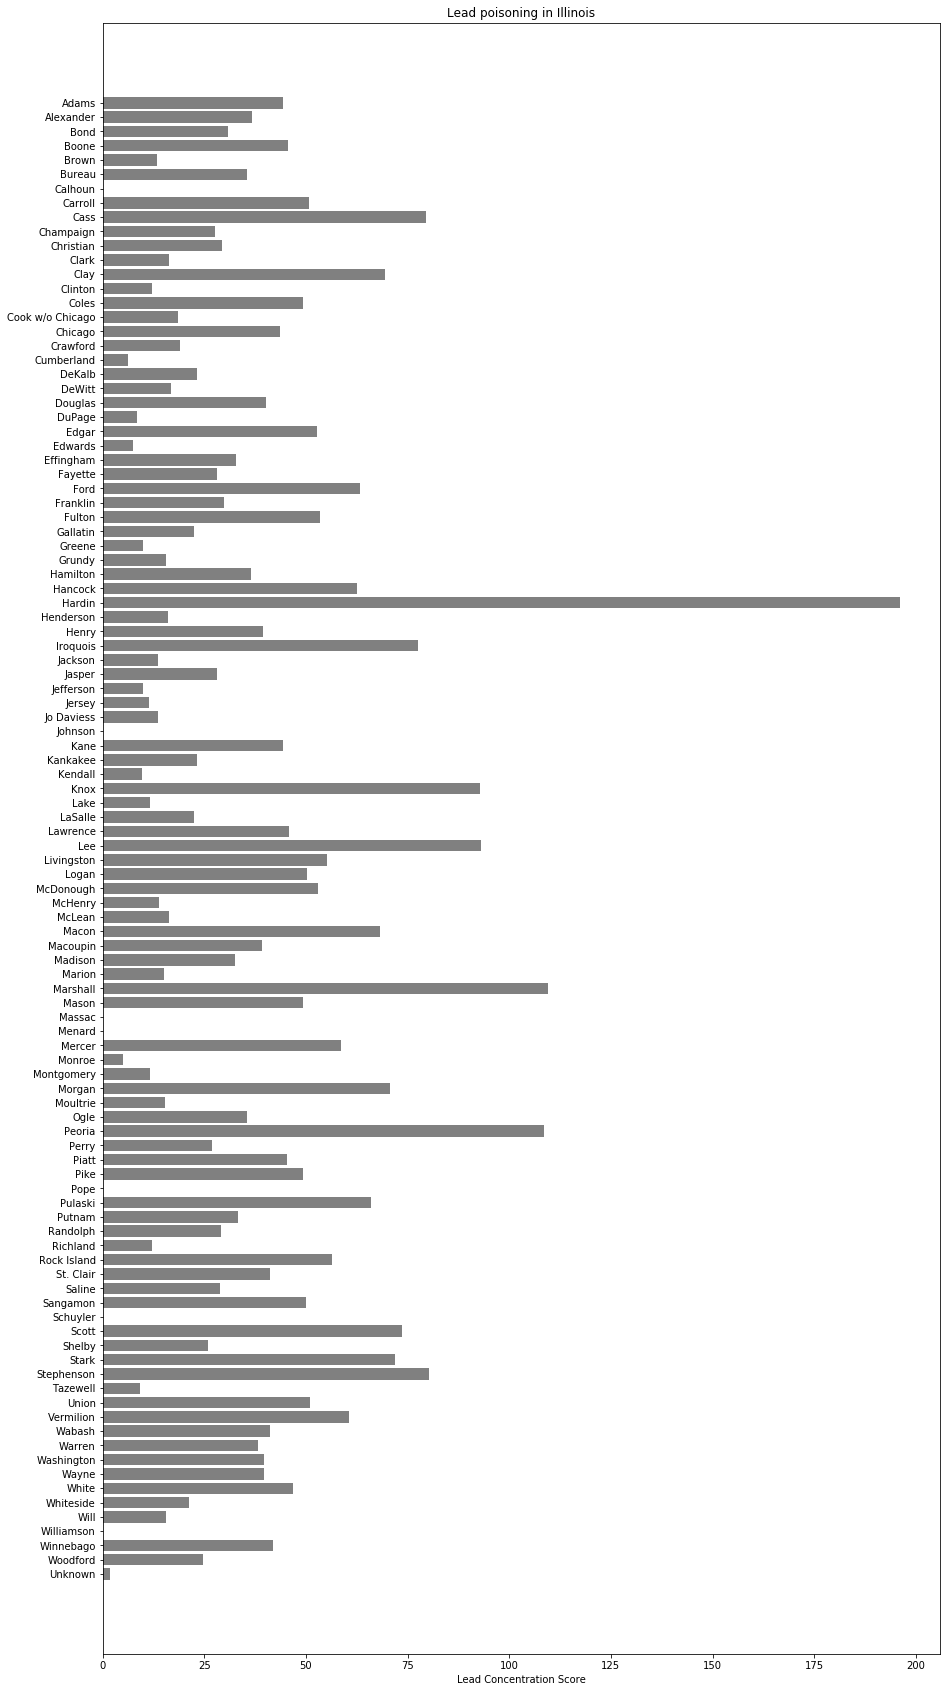

In [25]:
# Also, to quicly identify the most affected counties by lead poisoning in 2006 (latest data available), 
#I am also proposing a static visualization of the lscore per county: 

# I am using the 2006 dataset specifically:

data1 = pd.read_csv('https://raw.githubusercontent.com/tguigma/DataViz_Final-Project/master/Lead2006.csv')

fig, ax = plt.subplots(figsize=(15,30))


ax.barh(data1['county'], data1['lscore'], align='center',
        color='grey', ecolor='black')
ax.set_xlabel('Lead Concentration Score')
ax.invert_yaxis() 
ax.set_title('Lead poisoning in Illinois')


plt.show()

                It appears Hardin is the most affected county based on our estimation of the lscore. 

I am finally adding visualizations from the Illinois Lead Program Annual Surveillance Report 2006 to investigate the causes 
of lead poisoning in the State that year:
the report is available at http://www.idph.state.il.us/envhealth/pdf/Lead_Surv_Rpt_06.pdf 



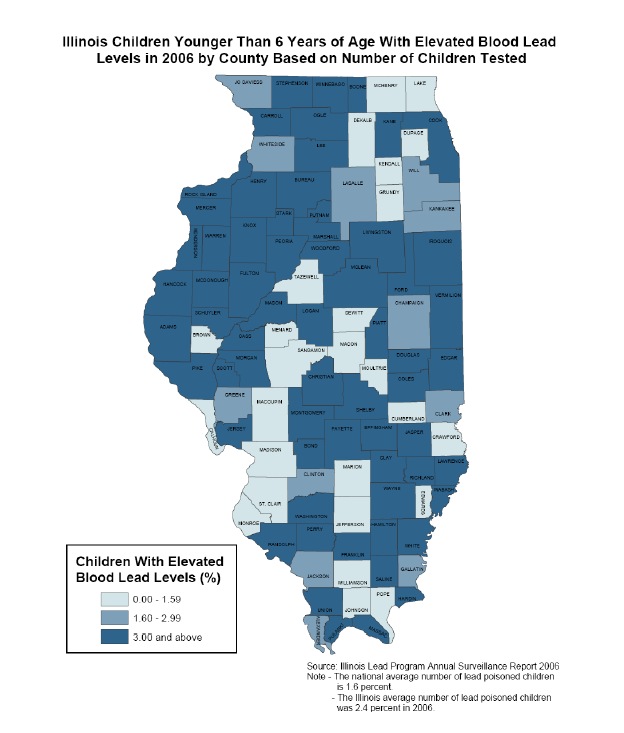

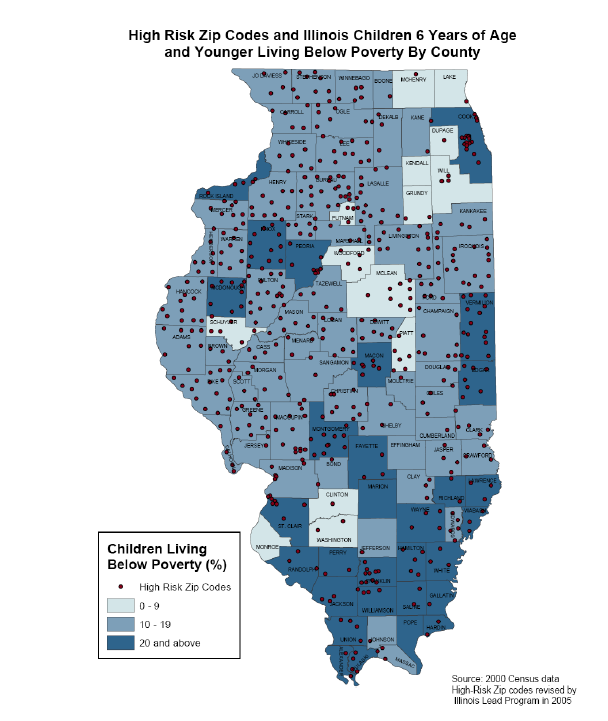